In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
df=pd.read_csv('Heart Disease data.csv')

In [60]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [61]:
df = df.rename(columns={'chol': 'Cholestrol','cp': 'Chest Pain','trestbps':'BP','thalach':'Heart rate'})

In [62]:
df.shape

(1025, 14)

HeatMap to identify Correlation Between different Feature

<Axes: >

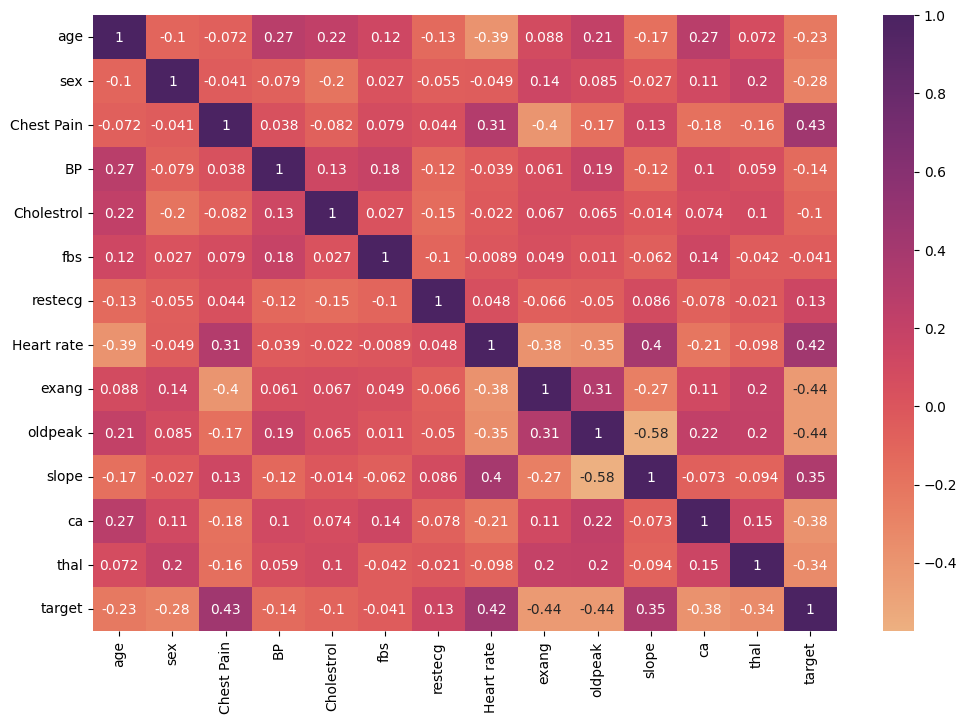

In [63]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), square=False, cmap='flare', annot=True)

In [64]:
df.describe()

,age,sex,Chest Pain,BP,Cholestrol,fbs,restecg,Heart rate,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [65]:
df['sex'] = df['sex'].replace({0: 'f', 1: 'm'})

In [66]:
df.head()

,age,sex,Chest Pain,BP,Cholestrol,fbs,restecg,Heart rate,exang,oldpeak,slope,ca,thal,target
0,52,m,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,m,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,m,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,m,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,f,0,138,294,1,1,106,0,1.9,1,3,2,0


Percentage of Males having high Blood Sugar


In [67]:
num_males = df['sex'].value_counts()['m']
print(num_males)
num_males_high_sugar = len(df[(df['sex'] == 'm') & (df['fbs'] == 1)])
print(num_males_high_sugar)
perc=(num_males_high_sugar/num_males)*100
print(f"{perc} %")

713
111
15.568022440392706 %


Age wise Distribution in Males having High Sugar


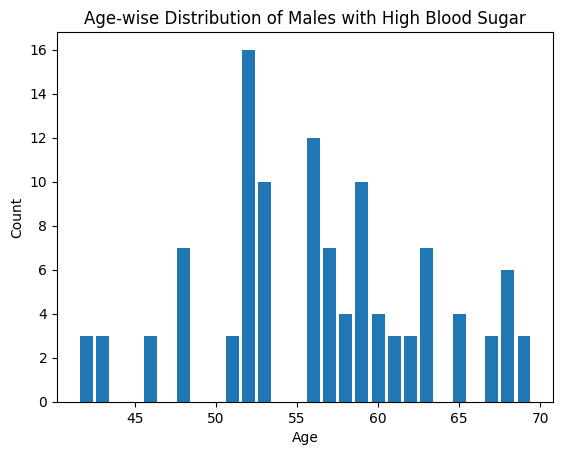

In [68]:
filtered_data = df.loc[(df['sex'] == 'm') & (df['fbs'] == 1), 'age']

age_counts = filtered_data.value_counts().sort_index()

x = age_counts.index
y = age_counts.values

plt.bar(x, y)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age-wise Distribution of Males with High Blood Sugar')
plt.show()

Now we will analyze the same data for Female

In [69]:
num_f = df['sex'].value_counts()['f']
print(num_f)
num_f_high_sugar = len(df[(df['sex'] == 'f') & (df['fbs'] == 1)])
print(num_f_high_sugar)
perc=(num_f_high_sugar/num_f)*100
print(f"{perc} %")

312
42
13.461538461538462 %


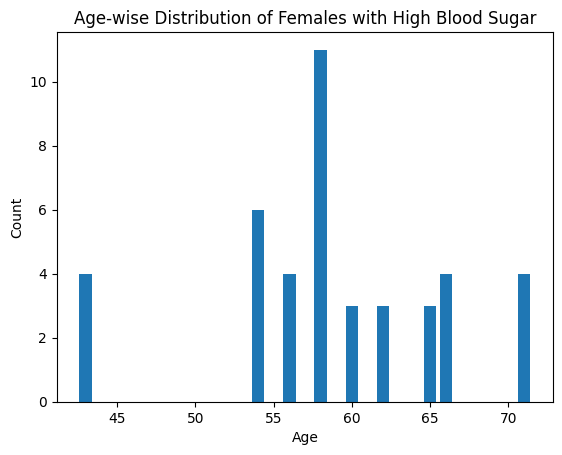

In [70]:
filtered_data = df.loc[(df['sex'] == 'f') & (df['fbs'] == 1), 'age']

age_counts = filtered_data.value_counts().sort_index()

x = age_counts.index
y = age_counts.values

plt.bar(x, y)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age-wise Distribution of Females with High Blood Sugar')
plt.show()

In [71]:
num_hbp = df[df['BP'] > 120]['BP'].count()
num_hbp

696

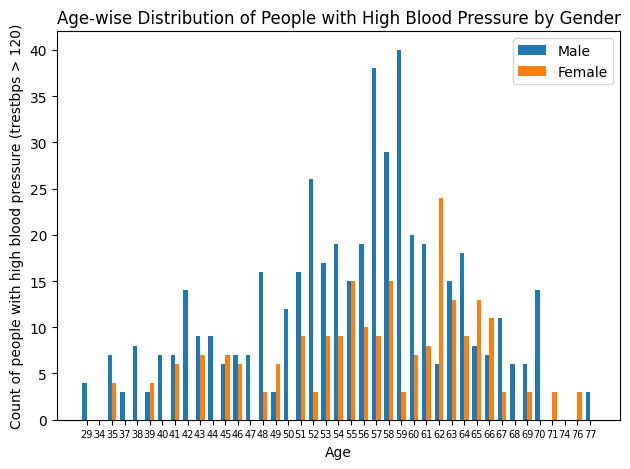

In [72]:

high_bp = df[df['BP'] > 120]

males_high_bp = high_bp[high_bp['sex'] == 'm']
females_high_bp = high_bp[high_bp['sex'] == 'f']

male_age_counts = males_high_bp['age'].value_counts().sort_index()
female_age_counts = females_high_bp['age'].value_counts().sort_index()

ages = np.sort(df['age'].unique())

male_counts = [male_age_counts.get(age, 0) for age in ages]
female_counts = [female_age_counts.get(age, 0) for age in ages]

bar_width = 0.35
index = np.arange(len(ages))

plt.bar(index, male_counts, width=bar_width, label='Male')
plt.bar(index + bar_width, female_counts, width=bar_width, label='Female')

plt.xlabel('Age')
plt.ylabel('Count of people with high blood pressure (trestbps > 120)')
plt.title('Age-wise Distribution of People with High Blood Pressure by Gender')
plt.xticks(index + bar_width / 2, ages, fontsize=7)
plt.legend()
plt.tight_layout()
plt.show()


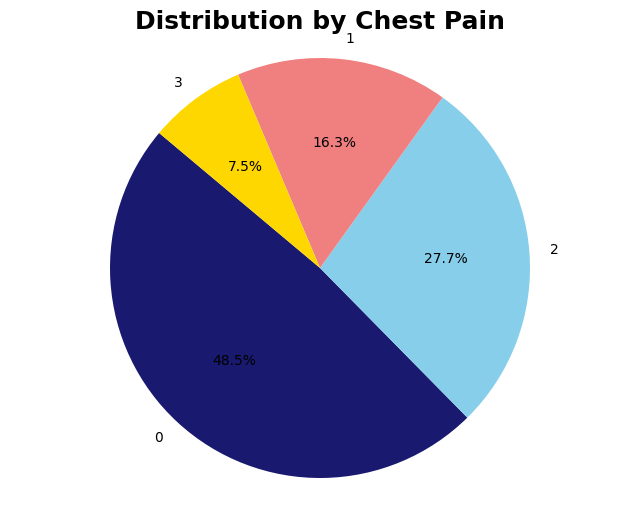

In [73]:
chest_pain_counts = df['Chest Pain'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(chest_pain_counts, labels=chest_pain_counts.index, autopct='%1.1f%%', startangle=140, colors=['midnightblue', 'skyblue', 'lightcoral', 'gold'])
plt.title('Distribution by Chest Pain', fontsize=18, fontweight='bold')
plt.axis('equal')
plt.show()

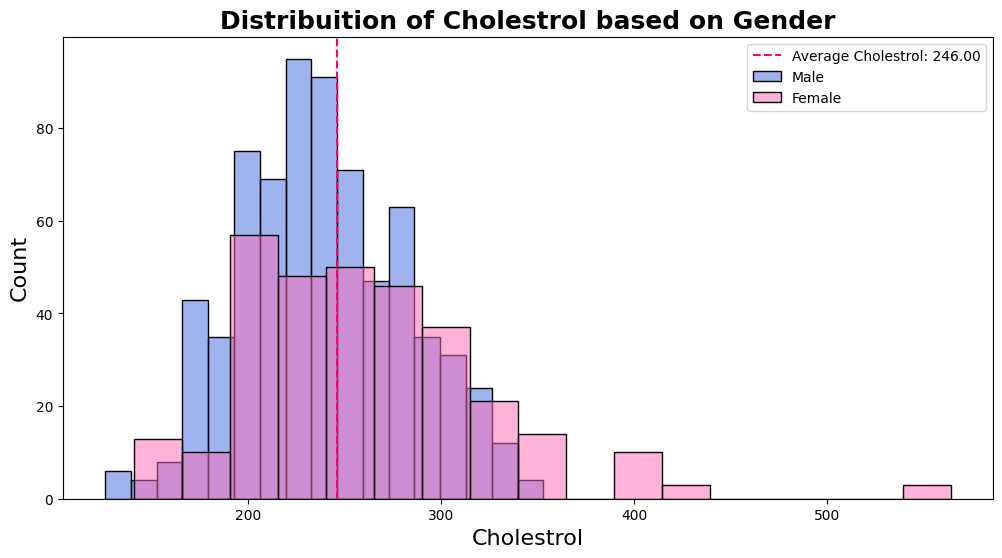

In [74]:
average_chol = np.mean(df['Cholestrol'])
plt.figure(figsize=(12,6))
plt.title('Distribuition of Cholestrol based on Gender', fontsize=18, fontweight='bold')
sns.histplot(df[df['sex']=='m']['Cholestrol'], alpha=0.5, color='#4169E1', label='Male')
sns.histplot(df[df['sex']=='f']['Cholestrol'], alpha=0.5, color='#FF69B4', label='Female')
plt.axvline(x=average_chol, color='#ff006e', linestyle='--', label=f'Average Cholestrol: {average_chol:.2f}')
plt.xlabel('Cholestrol', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.legend()

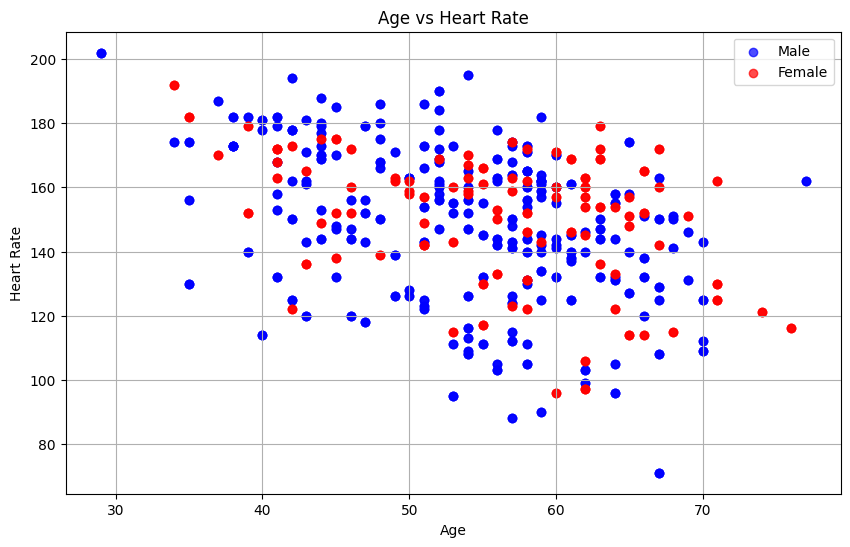

In [75]:
males = df[df['sex'] == 'm']
females = df[df['sex'] == 'f']

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(males['age'], males['Heart rate'], color='blue', alpha=0.7, label='Male')
plt.scatter(females['age'], females['Heart rate'], color='red', alpha=0.7, label='Female')

plt.title('Age vs Heart Rate')
plt.xlabel('Age')
plt.ylabel('Heart Rate')
plt.legend()
plt.grid(True)
plt.show()